In [14]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# checking for missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
# Filling Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop Cabin since it has many missing values
df.drop('Cabin', axis=1, inplace=True)

# Filling Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
df.drop_duplicates(inplace=True)


In [20]:
# EDA
total = df.shape[0]
print(f"Total passengers: {total}")


Total passengers: 891


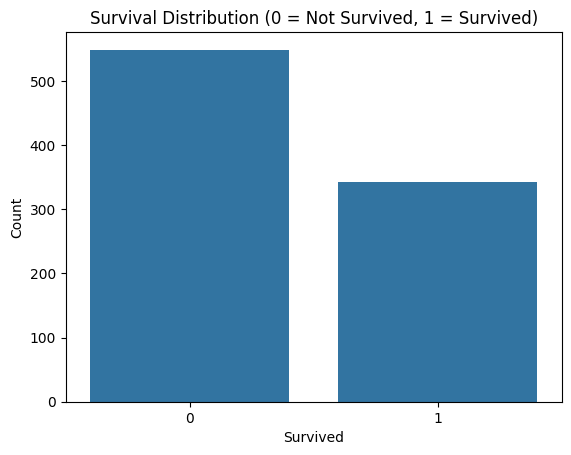

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution (0 = Not Survived, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [22]:
# To print survival count [0= Not survived,1= survived]
print(df['Survived'].value_counts())


Survived
0    549
1    342
Name: count, dtype: int64


In [23]:
# To find survival percentage
survived_pct = df['Survived'].value_counts(normalize=True) * 100
print(survived_pct)


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


Total number of passengers were 891. Out of this Survival rate: ~38% survived and ~62% did not.

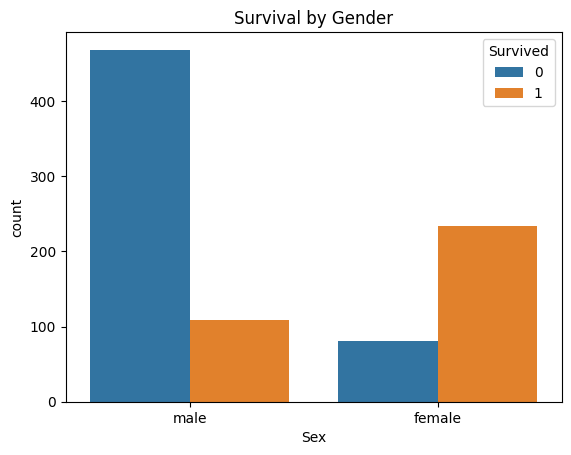

In [24]:
# survival distribution by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()


Women had a much higher survival rate than men.

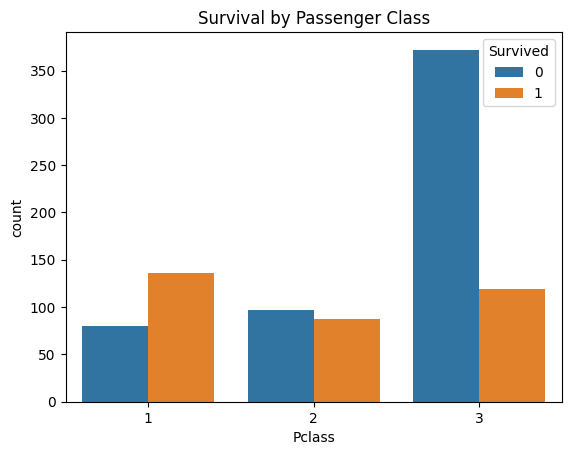

In [25]:
# survival distribution by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()


1st class passengers had the highest survival rate.
3rd class passengers had the highest number of deaths.
2nd class survival was in between.
We can say that 1 class ticket ensures safety of passengers than other 2 classes.

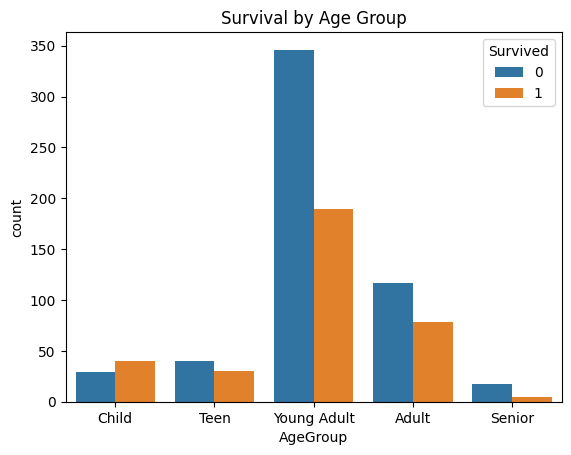

In [26]:
# Survival distribution by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title('Survival by Age Group')
plt.show()


From this graph ,children have more survival rate than all the other categoriess.